In [1]:
import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
#Generar un conjunto de datos de clasificación sintético
X, y = make_classification(n_samples=100, n_features=5,
                           n_classes=2)

In [3]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Convertir las etiquetas a codificación one-hot
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_test)

In [5]:
import pandas as pd

# Convertir X en DataFrames
X_train_df = pd.DataFrame(X_train.reshape((X_train.shape[0], -1)))
X_test_df = pd.DataFrame(X_test.reshape((X_test.shape[0], -1)))

# Convertir Y en Dataframe
y_train_df = pd.Series(y_train, name="label")
y_test_df = pd.Series(y_test, name="label")

# Combinar en DataFrames
X_df = pd.concat([X_train_df, X_test_df], axis=1)
Y_df = pd.concat([y_train_df, y_test_df ], axis=1)

# Mostrar los DataFrames
print("Training DataFrame:")
print(X_df.head())

print("\nTest DataFrame:")
print(Y_df.head())

Training DataFrame:
          0         1         2         3         4         0         1  \
0  0.654919  1.251375 -0.532784 -1.869295  0.669425  0.334303  0.848560   
1  0.045314  0.121450  0.512660 -0.080397  0.164832 -0.275863 -0.644897   
2 -0.340723 -0.316765 -0.830481  1.441661  0.787879  0.814215  1.475496   
3 -1.001334 -2.245074 -1.168858  2.392369 -2.151248 -0.314558 -0.732885   
4 -1.139972 -2.597853  1.946672  2.664738 -2.591647 -0.253955 -0.117558   

          2         3         4  
0 -0.994307 -0.659728  1.054788  
1  0.431569  0.622050 -0.682354  
2  0.744403 -2.436604  0.559477  
3  0.414409  0.712768 -0.769672  
4  0.454889  1.240903  0.990148  

Test DataFrame:
   label  label
0      0    0.0
1      1    1.0
2      1    0.0
3      1    1.0
4      1    1.0


In [ ]:
#Crear una instancia de un modelo secuencial de Keras
model = keras.models.Sequential()

In [ ]:
#Añadir una capa oculta con 10 neuronas y activación ReLU
model.add(keras.layers.Dense(10,
          input_shape= (X_train.shape[1],), activation = 'relu'))
#Añadir una capa de salida con 2 neuronas (una para cada clase)
#y activación softmax
model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
#Entrenar el modelo
hist = model.fit(X_train, y_train_categorical, epochs=10,
          batch_size=32, validation_data=(X_test, y_test_categorical))


Epoch 1/10
3/3 [==============================] - 0s 72ms/step - loss: 0.1959 - accuracy: 0.9375 - val_loss: 0.4057 - val_accuracy: 0.8000
Epoch 2/10
3/3 [==============================] - 0s 27ms/step - loss: 0.1958 - accuracy: 0.9375 - val_loss: 0.4056 - val_accuracy: 0.8000
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1956 - accuracy: 0.9375 - val_loss: 0.4057 - val_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.1954 - accuracy: 0.9375 - val_loss: 0.4059 - val_accuracy: 0.8000
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1954 - accuracy: 0.9375 - val_loss: 0.4059 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1951 - accuracy: 0.9375 - val_loss: 0.4059 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.1949 - accuracy: 0.9375 - val_loss: 0.4058 - val_accuracy: 0.8000
Epoch 8/10
3/3 [===========

In [41]:
#Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test_categorical)

1/1 [==============================] - 0s 21ms/step - loss: 0.4053 - accuracy: 0.8000


In [42]:
#Impresión de resultados
print("Perdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


Perdida en el conjunto de prueba: 0.4052824079990387
Precisión en el conjunto de prueba: 0.800000011920929


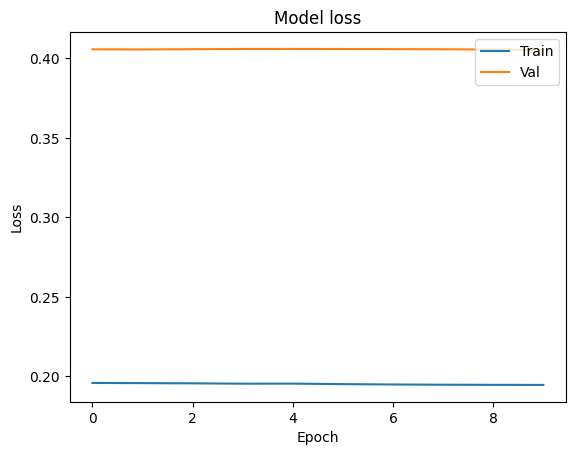

In [43]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [44]:
#Entrenar el modelo con más épocas
hist = model.fit(X_train, y_train_categorical, epochs=1000,
          batch_size=64, validation_data=(X_test, y_test_categorical))


Epoch 1/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.1944 - accuracy: 0.9375 - val_loss: 0.4053 - val_accuracy: 0.8000
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1944 - accuracy: 0.9375 - val_loss: 0.4053 - val_accuracy: 0.8000
Epoch 3/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.1943 - accuracy: 0.9375 - val_loss: 0.4053 - val_accuracy: 0.8000
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1942 - accuracy: 0.9375 - val_loss: 0.4054 - val_accuracy: 0.8000
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1941 - accuracy: 0.9375 - val_loss: 0.4054 - val_accuracy: 0.8000
Epoch 6/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1941 - accuracy: 0.9375 - val_loss: 0.4054 - val_accuracy: 0.8000
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1940 - accuracy: 0.9375 - val_loss: 0.4055 - val_accuracy: 0.8000
Epoch 8/1000


In [45]:
#Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test_categorical)

1/1 [==============================] - 0s 21ms/step - loss: 0.4780 - accuracy: 0.8500


In [46]:
#Impresión de resultados
print("Perdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Perdida en el conjunto de prueba: 0.47802838683128357
Precisión en el conjunto de prueba: 0.8500000238418579


1/1 [==============================] - 0s 18ms/step
Shape of y_test: (20, 2)
Shape of Y_pred: (20, 2)
Shape of y_test after adjustment: (20, 2)
Shape of Y_pred after adjustment: (20, 2)
R^2 score =  0.48645624907128504
Mean Squared Error =  0.12710208
Root Mean Squared Error =  0.3565137823525112
Mean Absolute Error =  0.18112838


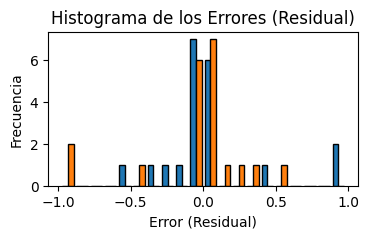

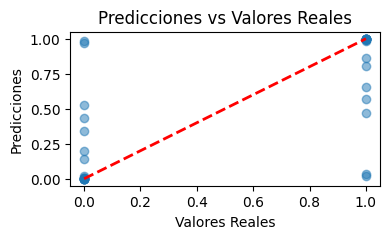

In [60]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión
import matplotlib.pyplot as plt

# Generar predicciones
Y_pred = model.predict(X_test)

# Verificar las formas de y_test y Y_pred
print("Shape of y_test:", y_test_categorical.shape)
print("Shape of Y_pred:", Y_pred.shape)

# Ajustar la forma de Y_pred para que coincida con y_test_categorical
if Y_pred.shape[-1] == 1:
    Y_pred = np.squeeze(Y_pred, axis=-1)

# Verificar que las formas coincidan después del ajuste
print("Shape of y_test after adjustment:", y_test_categorical.shape)
print("Shape of Y_pred after adjustment:", Y_pred.shape)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(y_test_categorical, Y_pred)
mse = mean_squared_error(y_test_categorical, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_categorical, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_pred - y_test_categorical

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(y_test_categorical, Y_pred, alpha=0.5)
plt.plot([y_test_categorical.min(), y_test_categorical.max()],
         [y_test_categorical.min(), y_test_categorical.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

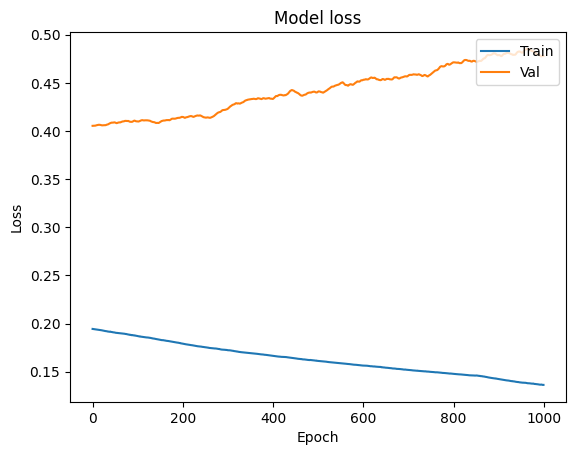

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()